In [1]:
#import main libraries (numpy for data and matplotlib for plotting)
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [2]:

#User parameters
features=['A+IGBT-I', 'A+*IGBT-I', 'B+IGBT-I', 'B+*IGBT-I', 'C+IGBT-I', 'C+*IGBT-I', 'A-FLUX', 
          'B-FLUX', 'C-FLUX', 'MOD-V', 'MOD-I', 'CB-I', 'CB-V', 'DV/DT']  # waveform names to use as a header
feature_index=6  # A-flux waveform (for plotting). Use 0 for A+IGBT-I, 1 for A+*IGBT-I, and so on.
system='RFQ'     # pick a system to load and plot. Choose RFQ, DTL, CCL, or SCL

In [3]:
#load both waveform (X) and labels (Y) datasets for an HVCM module, e.g. RFQ, DTL, CCL, SCL
X= np.load('./hvcm/%s.npy'%system)   #---> X array has shape: (pulses, times, features)
Y=np.load('./hvcm/%s_labels.npy'%system, allow_pickle=True)  #---> Y array has shape: (pulses, labels) --> labels are: index, state, type
time=np.arange(X.shape[1]) * 400e-9    #create time axis based on the sampling rate 400 ns (for plotting purposes)

In [4]:
print(X.shape)
print(Y.shape)
print(Y[1])
print(Y[690])

(872, 4500, 14)
(872, 3)
['./RFQ/RFQ_400ns_12_Hour_Run_3.12.2022-6.23.59AM.csv' 'Run' 'Normal']
['./RFQ/RFQ_400ns_Fault_1.11.2022-4.48.40PM.csv' 'Fault' 'TPS Fault']


In [5]:
# Split X/Y arrays into fault and normal data

#obtain array indices to split normal and fault data using the second column in Y """
fault_indices, normal_indices=np.where(Y[:,1] == 'Fault')[0], np.where(Y[:,1] == 'Run')[0]

In [6]:
print(fault_indices)

[690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707
 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725
 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743
 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761
 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779
 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797
 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815
 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833
 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851
 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869
 870 871]


In [7]:
print(normal_indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [8]:
#Use the indices to assign normal data to `Xnormal` and fault data to `Xanomaly` 
Xnormal, Xanomaly = X[normal_indices,:,:], X[fault_indices,:,:]

In [9]:
print(Xnormal.shape)
print(Xanomaly.shape)

(690, 4500, 14)
(182, 4500, 14)


In [10]:
#Use the indices to assign the labels of normal data to `Ynormal` and fault labels to `Yanomaly` 
Ynormal, Yanomaly = Y[normal_indices,:], Y[fault_indices,:]   #labels are: index, state, type

In [11]:
print(Ynormal.shape)
print(Yanomaly.shape)

(690, 3)
(182, 3)


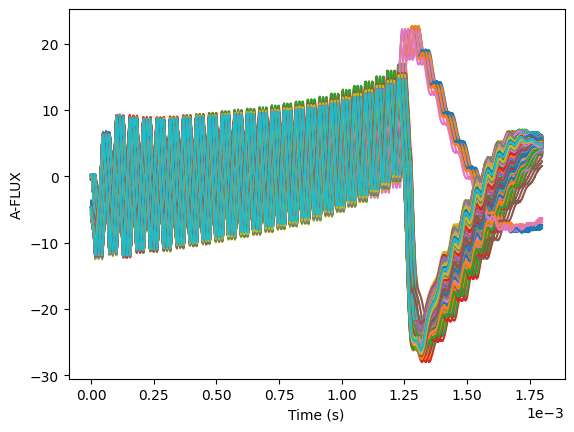

In [48]:
#plot normal pulses
#------------------------
plt.figure()
#loop over all normal pulses and plot the waveform given by feature_index
for i in range(Xnormal.shape[0]):   
    plt.plot(time, Xnormal[i,:,feature_index])   #plot A-flux normal
    # if i == 9 :
    #     break

plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index])  #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

In [13]:
Xnormal.shape

(690, 4500, 14)

In [14]:
Xnormal.shape[0]
print(Xnormal[0])

[[ 1.2708e+01  1.8812e+01  1.3410e+01 ... -4.6037e-02  2.1794e+03
  -4.9399e+01]
 [ 1.5150e+01  1.7591e+01  1.2190e+01 ... -4.6037e-02  2.1793e+03
  -1.0334e+01]
 [ 1.3929e+01  1.6370e+01  1.2190e+01 ...  1.5000e-02  2.1814e+03
  -1.0335e+01]
 ...
 [ 1.5150e+01  1.6370e+01  2.8059e+01 ...  1.5000e-02  2.0873e+03
   1.6520e+01]
 [ 1.6370e+01  1.6370e+01  2.8059e+01 ...  1.5000e-02  2.0888e+03
   4.3200e+00]
 [ 1.3929e+01  1.7591e+01  2.5618e+01 ... -4.6037e-02  2.0893e+03
  -1.7660e+01]]


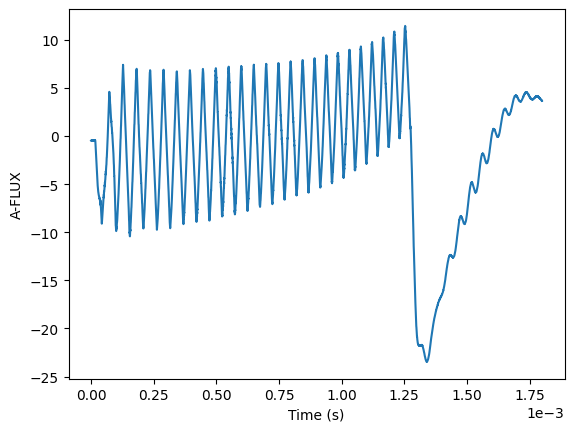

In [44]:
plt.figure()
#loop over all normal pulses and plot the waveform given by feature_index
plt.plot(time, Xnormal[0,:,feature_index])   #plot A-flux normal

plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index])  #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

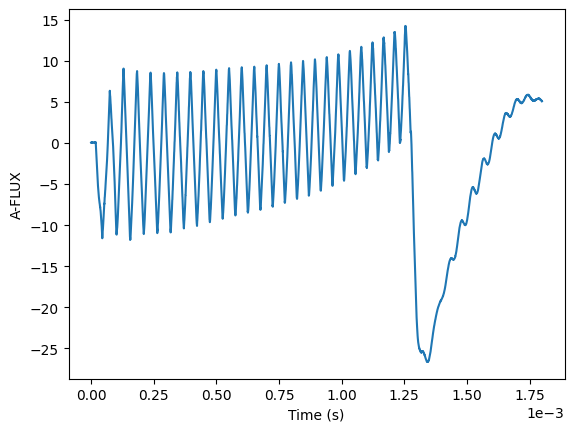

In [45]:
plt.figure()
#loop over all normal pulses and plot the waveform given by feature_index
plt.plot(time, Xnormal[1,:,feature_index])   #plot A-flux normal

plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index])  #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

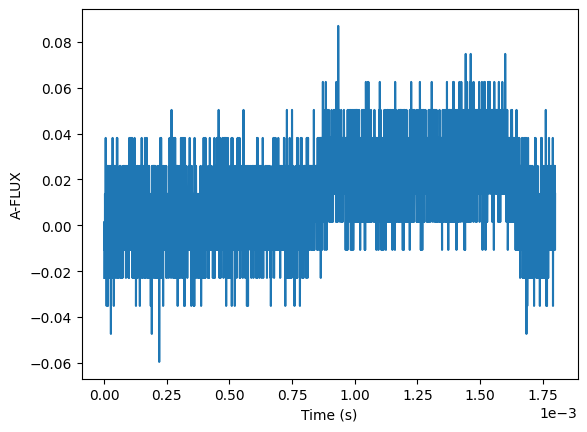

In [46]:
feature_index = 6
plt.figure()
#loop over all normal pulses and plot the waveform given by feature_index
plt.plot(time, Xanomaly[0,:,feature_index])   #plot A-flux normal

plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index])  #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

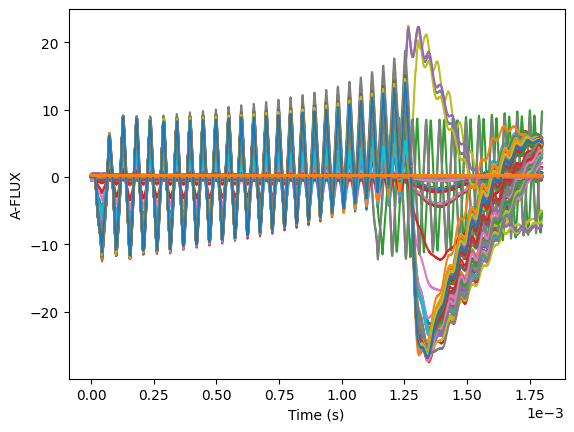

In [47]:
feature_index = 6
plt.figure()
#loop over all normal pulses and plot the waveform given by feature_index
for i in range(Xanomaly.shape[0]):
    plt.plot(time, Xanomaly[i,:,feature_index])   #plot A-flux normal

plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index])  #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

In [19]:
Xanomaly.shape[0]

182

In [20]:
Xnormal.shape[0] + Xanomaly.shape[0] # 정상 데이터 : 고장 데이터 = 79 : 21 (고장율 대략 20% 정도)

872

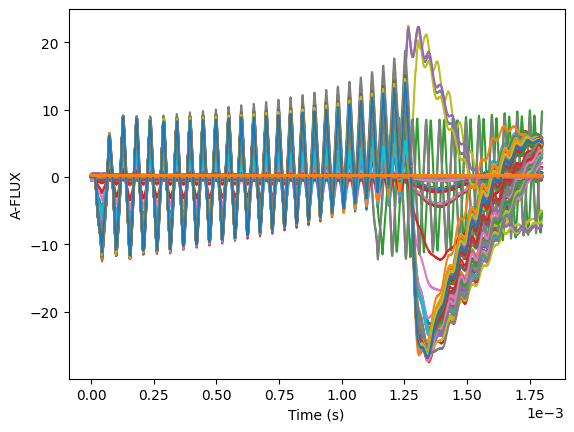

In [21]:
#plot faulty pulses
#------------------------
plt.figure()
#loop over all faulty pulses and plot the waveform given by feature_index
for i in range(Xanomaly.shape[0]):
    plt.plot(time, Xanomaly[i,:,feature_index])   #plot A-flux faults
plt.xlabel('Time (s)')  #add x-label
plt.ylabel(features[feature_index]) #add y-label
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #use sci notation
plt.show()  #show the plot

In [22]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89


In [23]:
Xnormal.shape

(690, 4500, 14)

In [24]:
Xnormal[:,:,6].shape

(690, 4500)

In [25]:
Ynormal[:,].shape

(690, 3)

In [26]:
Xanomaly[:,:,6].shape

(182, 4500)

In [27]:
isinstance(Xnormal, object)

True

In [28]:
for column in Ynormal.T:
    print(np.unique(column))

['./RFQ/RFQ_400ns_12_Day_Run_5.28.2022-5.08.29PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_3.12.2022-6.23.59AM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_3.12.2022-9.00.25PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_3.14.2022-9.50.42PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_3.9.2022-10.21.45PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_5.12.2022-6.44.08AM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_5.12.2022-8.21.19PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_5.14.2022-2.00.35AM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_5.15.2022-1.27.27PM.csv'
 './RFQ/RFQ_400ns_12_Hour_Run_5.17.2022-5.08.29AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.11.2022-6.35.59PM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.12.2022-9.12.25AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.14.2022-10.02.42AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.14.2022-9.37.54AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.15.2022-9.50.23AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.8.2022-3.32.39PM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_3.9.2022-10.33.45AM.csv'
 './RFQ/RFQ_400ns_12_Minute_Run_5.10.2022-12.45.26PM

In [29]:
for column in Yanomaly.T:
    print(np.unique(column))

['./RFQ/RFQ_400ns_Fault_1.11.2022-4.48.40PM.csv'
 './RFQ/RFQ_400ns_Fault_1.14.2022-4.03.34PM.csv'
 './RFQ/RFQ_400ns_Fault_1.27.2020-12.47.01PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-3.06.43PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-5.40.44PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-5.47.50PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-7.15.11PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-7.25.48PM.csv'
 './RFQ/RFQ_400ns_Fault_1.29.2021-7.56.01PM.csv'
 './RFQ/RFQ_400ns_Fault_1.9.2020-7.39.31AM.csv'
 './RFQ/RFQ_400ns_Fault_10.1.2021-9.10.38AM.csv'
 './RFQ/RFQ_400ns_Fault_10.12.2021-1.38.07PM.csv'
 './RFQ/RFQ_400ns_Fault_10.13.2020-6.12.01PM.csv'
 './RFQ/RFQ_400ns_Fault_10.13.2020-6.16.45PM.csv'
 './RFQ/RFQ_400ns_Fault_10.13.2020-8.25.58PM.csv'
 './RFQ/RFQ_400ns_Fault_10.13.2020-8.26.38PM.csv'
 './RFQ/RFQ_400ns_Fault_10.18.2021-12.33.26PM.csv'
 './RFQ/RFQ_400ns_Fault_10.20.2021-3.23.23PM.csv'
 './RFQ/RFQ_400ns_Fault_10.20.2021-9.23.32AM.csv'
 './RFQ/RFQ_400ns_Fault_10.22.2021-3.46.05AM.csv'
 './RFQ/RF

In [30]:
for column in Yanomaly[:,2].T:
    print(np.unique(column))

['TPS Fault']
['TPS Fault']
['SNS PPS Missing']
['Fiber Fault']
['C FLUX Low Fault']
['C FLUX Low Fault']
['C FLUX Low Fault']
['C FLUX Low Fault']
['C FLUX Low Fault']
['Fiber Fault']
['SCR AC Input Fault']
['A FLUX Low Fault']
['A- Driver Fault']
['A- Driver Fault']
['A- Driver Fault']
['A- Driver Fault']
['SNS PPS Missing']
['DV/DT High Fault']
['TPS Fault']
['Fiber Fault']
['SNS PPS Missing']
['+ DC I High Fault']
['A-* Driver Fault']
['Fiber Fault']
['TPS Fault']
['+ CB V High Fault']
['Fiber Fault']
['A-* Driver Fault']
['TPS Fault']
['TPS Fault']
['A-* Driver Fault']
['DV/DT High Fault']
['DV/DT High Fault']
['A FLUX Low Fault']
['+ DC I High Fault']
['DV/DT Low Fault']
['A-* Driver Fault']
['SCR AC Input Fault']
['+ DC I High Fault']
['A-* Driver Fault']
['TPS Fault']
['SCR Firing Circ Fault']
['Dump Switch Fault']
['Dump Switch Fault']
['Dump Switch Fault']
['SCR Firing Circ Fault']
['A-* Driver Fault']
['SNS PPS Missing']
['SNS PPS Missing']
['SCR AC Input Fault']
['SNS PPS M

In [31]:
print(Ynormal.T.shape)
print(Yanomaly.T.shape)

(3, 690)
(3, 182)


In [32]:
print(Xnormal.shape)
print(Xnormal[0])
print(Ynormal.shape)
print(Ynormal[0])

(690, 4500, 14)
[[ 1.2708e+01  1.8812e+01  1.3410e+01 ... -4.6037e-02  2.1794e+03
  -4.9399e+01]
 [ 1.5150e+01  1.7591e+01  1.2190e+01 ... -4.6037e-02  2.1793e+03
  -1.0334e+01]
 [ 1.3929e+01  1.6370e+01  1.2190e+01 ...  1.5000e-02  2.1814e+03
  -1.0335e+01]
 ...
 [ 1.5150e+01  1.6370e+01  2.8059e+01 ...  1.5000e-02  2.0873e+03
   1.6520e+01]
 [ 1.6370e+01  1.6370e+01  2.8059e+01 ...  1.5000e-02  2.0888e+03
   4.3200e+00]
 [ 1.3929e+01  1.7591e+01  2.5618e+01 ... -4.6037e-02  2.0893e+03
  -1.7660e+01]]
(690, 3)
['./RFQ/RFQ_400ns_12_Day_Run_5.28.2022-5.08.29PM.csv' 'Run' 'Normal']


In [33]:
print(Xanomaly.shape)
print(Xanomaly[0])
print(Yanomaly.shape)
print(Yanomaly[0])

(182, 4500, 14)
[[-5.8370e+00 -3.3955e+00 -5.1347e+00 ... -4.6037e-02  2.2826e+03
  -1.7660e+01]
 [-7.0577e+00  1.4875e+00 -6.3555e+00 ... -1.0707e-01  2.2849e+03
  -1.2776e+01]
 [-5.8370e+00 -9.5401e-01 -3.9140e+00 ... -1.0707e-01  2.2865e+03
  -1.5218e+01]
 ...
 [-2.1747e+00 -4.6162e+00 -5.1347e+00 ...  1.5000e-02  2.2834e+03
  -5.4520e+00]
 [-4.6162e+00  2.6673e-01 -5.1347e+00 ...  1.5000e-02  2.2824e+03
  -1.2777e+01]
 [-3.3955e+00 -9.5401e-01 -7.5762e+00 ...  4.5519e-02  2.2817e+03
  -1.2777e+01]]
(182, 3)
['./RFQ/RFQ_400ns_Fault_1.11.2022-4.48.40PM.csv' 'Fault' 'TPS Fault']
